pip install scikit-learn

pip install scikit-learn tensorflow

Link Of Dataset : https://www.kaggle.com/datasets/shayalvaghasiya/ddos-sdn/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection & Processing

Read The Dataset

In [2]:
data = pd.read_csv('combined_dataset.csv')
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,10086,2,167772161,167772167,113850,121364100,252,911000000,2.530000e+11,3,...,1,2,4221,243018786,0,2601.0,0,0,2601.0,0
1,11575,4,167772173,167772168,93742,97679164,300,869000000,3.010000e+11,5,...,1,4,3735,3413,0,0.0,0,0,0.0,1
2,11485,4,167772180,167772168,97480,101574160,310,754000000,3.110000e+11,6,...,1,1,3795,1242,0,0.0,0,0,0.0,1
3,31993,7,167772161,167772175,129224,7494992,499,778000000,5.000000e+11,3,...,8,3,457026091,34127977,52,56.0,0,0,108.0,0
4,7057,4,167772167,167772161,86142,5686080,294,316000000,2.940000e+11,11,...,8,4,8839901,119929163,407,3751.0,0,0,4158.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,4097,3,167772164,167772168,42108,2779556,141,94000000,1.410000e+11,7,...,8,3,1936432,44709084,171,3922.0,0,0,4093.0,0
104341,11695,4,167772170,167772168,95541,99553722,320,312000000,3.200000e+11,3,...,1,2,3972,1472,0,0.0,0,0,0.0,1
104342,7602,9,167772178,167772169,910,89180,931,585000000,9.320000e+11,5,...,64,1,102532,98462,0,0.0,0,0,0.0,0
104343,2668,2,167772171,167772163,79432,84674512,173,22000000,1.730000e+11,6,...,1,1,3514,1172,0,0.0,0,0,0.0,0


print the first 5 rows of the dataframe


In [3]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,10086,2,167772161,167772167,113850,121364100,252,911000000,2.530000e+11,3,...,1,2,4221,243018786,0,2601.0,0,0,2601.0,0
1,11575,4,167772173,167772168,93742,97679164,300,869000000,3.010000e+11,5,...,1,4,3735,3413,0,0.0,0,0,0.0,1
2,11485,4,167772180,167772168,97480,101574160,310,754000000,3.110000e+11,6,...,1,1,3795,1242,0,0.0,0,0,0.0,1
3,31993,7,167772161,167772175,129224,7494992,499,778000000,5.000000e+11,3,...,8,3,457026091,34127977,52,56.0,0,0,108.0,0
4,7057,4,167772167,167772161,86142,5686080,294,316000000,2.940000e+11,11,...,8,4,8839901,119929163,407,3751.0,0,0,4158.0,1


print last 5 rows of the dataframe


In [4]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
104340,4097,3,167772164,167772168,42108,2779556,141,94000000,1.410000e+11,7,...,8,3,1936432,44709084,171,3922.0,0,0,4093.0,0
104341,11695,4,167772170,167772168,95541,99553722,320,312000000,3.200000e+11,3,...,1,2,3972,1472,0,0.0,0,0,0.0,1
104342,7602,9,167772178,167772169,910,89180,931,585000000,9.320000e+11,5,...,64,1,102532,98462,0,0.0,0,0,0.0,0
104343,2668,2,167772171,167772163,79432,84674512,173,22000000,1.730000e+11,6,...,1,1,3514,1172,0,0.0,0,0,0.0,0
104344,31813,2,167772161,167772174,106319,6166502,372,391000000,3.720000e+11,5,...,8,3,323329282,471082757,212,394.0,0,0,606.0,0


getting some information about the data


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  int64  
 3   dst          104345 non-null  int64  
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  int64  
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

statistical measures about the data


In [6]:
data.describe()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
count,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,...,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,104345.0,104345.0,103839.000000,104345.000000
mean,17927.514169,4.214260,1.677722e+08,1.677722e+08,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,...,27.922948,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,0.0,0.0,2007.578742,0.390857
std,11977.642655,1.956327,4.637614e+00,3.697039e+00,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,...,29.338108,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,0.0,0.0,3144.437173,0.487945
min,2488.000000,1.000000,1.677722e+08,1.677722e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,...,1.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,7098.000000,3.000000,1.677722e+08,1.677722e+08,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,...,1.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,11905.000000,4.000000,1.677722e+08,1.677722e+08,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,...,8.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,0.0,0.0,4.000000,0.000000
75%,29952.000000,5.000000,1.677722e+08,1.677722e+08,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,...,64.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,0.0,0.0,3838.000000,1.000000
max,42935.000000,10.000000,1.677722e+08,1.677722e+08,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,...,64.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,0.0,0.0,20580.000000,1.000000


visualize 

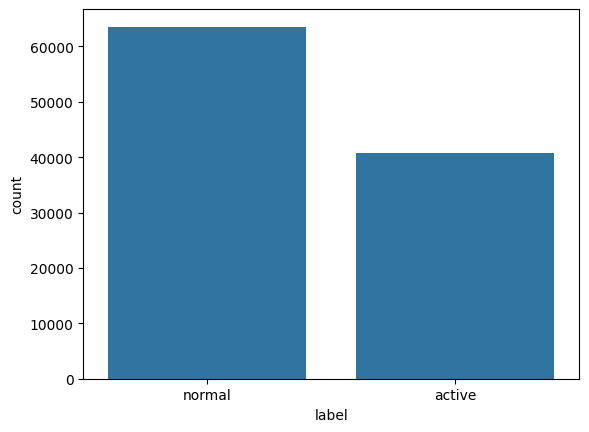

In [7]:
# Creating a count plot using seaborn to visualize the distribution of the 'label' column.
# This shows how many instances belong to each class (e.g., 'normal' and 'active').
sns.countplot(x='label', data=data)
# Setting the x-tick labels for the plot to 'normal' and 'active' instead of numerical values (0 and 1).
# This improves the readability of the plot.
plt.xticks(ticks=[0, 1], labels=['normal', 'active'])
plt.show()

 Calculating and displaying the number of unique values in each column of the DataFrame.

 This helps in understanding the variability of data within each column.

In [8]:
data.nunique()

dt               859
switch            10
src               19
dst               18
pktcount        9045
bytecount       9271
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
Protocol           3
port_no            5
tx_bytes       12257
rx_bytes       11625
tx_kbps         1800
rx_kbps         1730
A1                 1
A2                 1
tot_kbps        2259
label              2
dtype: int64

 Dropping unnecessary columns ('A1', 'A2', 'src', 'dst') from the DataFrame.

These columns might not be useful for the analysis or model building.

In [9]:
data = data.drop(columns = ['A1', 'A2', 'src', 'dst'])

Calculating and displaying the number of missing values in each column of the DataFrame.

 This helps in identifying columns that have missing data which might need to be addressed.

In [10]:
data.isnull().sum()

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

Displaying the shape of the DataFrame (number of rows and columns).

This provides an overview of the size of the dataset.

In [11]:
data.shape

(104345, 21)

 Dropping all rows from the DataFrame that contain any missing values.

In [12]:
data = data.dropna()

Re-checking for missing values after dropping rows with missing data.

Ideally, this should show zero missing values in each column.

In [13]:
data.isnull().sum()

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [14]:
data.shape

(103839, 21)

Separating the features (X) and the target variable (y).

'label' is the target variable, so it is separated from the other feature columns.

In [15]:
# Dropping the 'label' column from the DataFrame and saving the remaining features (all columns except 'label') in the variable X.
# 'axis=1' specifies that we are dropping a column, not a row.
X = data.drop('label', axis=1)
# Saving the 'label' column in the variable y.
# This separates the target variable (the output we want to predict) from the feature variables (the inputs we use for prediction).
y = data['label']

Machine Learning Model (Logistic Regression):

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


test_size=0.2: This parameter specifies the proportion of the dataset to include in the testing split. Here, it's set to 0.2, meaning that 20% of the data will be used for testing, and the remaining 80% will be used for training.

random_state=42: This parameter sets the random seed used for shuffling the data before splitting. Setting a random seed ensures that the data split is reproducible. The same seed value will always produce the same random splits, which is useful for debugging and ensuring consistent results.

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Users\SCH 2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [22]:
# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.6063174114021571


Classification Report:
Precision: The precision of a class is the ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions for that class.

Recall (or Sensitivity): The recall of a class is the ratio of true positives to the sum of true positives and false negatives. It measures the ability of the classifier to correctly identify instances of that class.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when classes are imbalanced.

Support: The support is the number of actual occurrences of the class in the dataset.

In [26]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.66      0.74      0.70     12683
           1       0.49      0.40      0.44      8085

    accuracy                           0.61     20768
   macro avg       0.58      0.57      0.57     20768
weighted avg       0.59      0.61      0.60     20768



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[9368 3315]
 [4861 3224]]


Deep Learning Model CNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [29]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the data for CNN (assuming the data needs to be reshaped, e.g., 1D to 2D if necessary)
#


In [30]:
# Reshaping the data for CNN (assuming the data needs to be reshaped, e.g., 1D to 2D if necessary)
# Assuming the feature vector length is appropriate for reshaping, e.g., (n_samples, height, width, channels)
# Here, reshaping to 2D with 1 channel (e.g., (n_samples, n_features, 1) for simplicity)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# One-hot encoding the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Model Building


In [31]:
# Defining the CNN architecture
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming binary classification with 'normal' and 'active' classes
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model Training


In [32]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5


2077/2077 [==============================] - 50s 22ms/step - loss: 0.1284 - accuracy: 0.9500 - val_loss: 0.0624 - val_accuracy: 0.9757
Epoch 2/5
2077/2077 [==============================] - 38s 18ms/step - loss: 0.0581 - accuracy: 0.9781 - val_loss: 0.0529 - val_accuracy: 0.9766
Epoch 3/5
2077/2077 [==============================] - 46s 22ms/step - loss: 0.0422 - accuracy: 0.9837 - val_loss: 0.0367 - val_accuracy: 0.9853
Epoch 4/5
2077/2077 [==============================] - 51s 25ms/step - loss: 0.0366 - accuracy: 0.9857 - val_loss: 0.0302 - val_accuracy: 0.9874
Epoch 5/5
2077/2077 [==============================] - 27s 13ms/step - loss: 0.0319 - accuracy: 0.9877 - val_loss: 0.0350 - val_accuracy: 0.9850


Model Evaluation


In [33]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
#print(f'Test loss: {test_loss:.4f}')

649/649 [==============================] - 9s 14ms/step - loss: 0.0309 - accuracy: 0.9865
Test accuracy: 0.9865
